<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           12 non-null     object
 1   Age in years  12 non-null     object
dtypes: object(2)
memory usage: 320.0+ bytes
None
        age                                       Age in years
0    Gender                       Gender ; Male - 1, Female -0
1        cp                                    Chest pain type
2  trestbps                             Resting blood pressure
3      chol                                cholesterol measure
4       fbs  (fasting blood sugar > 120 mg/dl) (1 = true; 0...
Missing values:
 age             0
Age in years    0
dtype: int64
Columns in dataset: Index(['age', 'Age in years'], dtype='object')
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00         3

    accuracy         

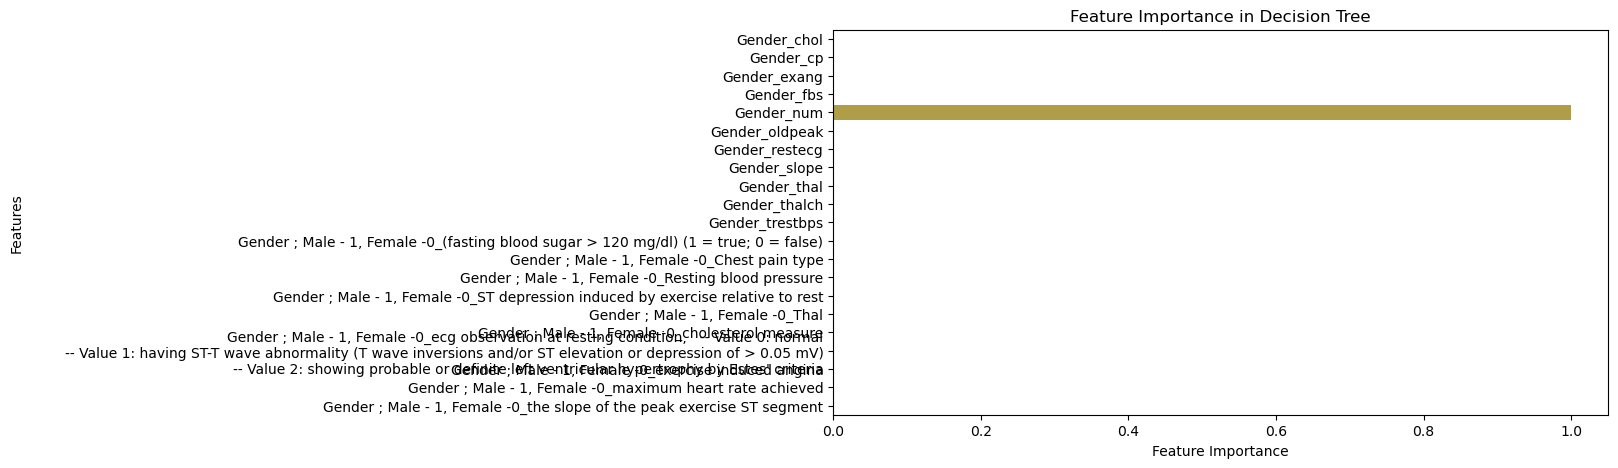

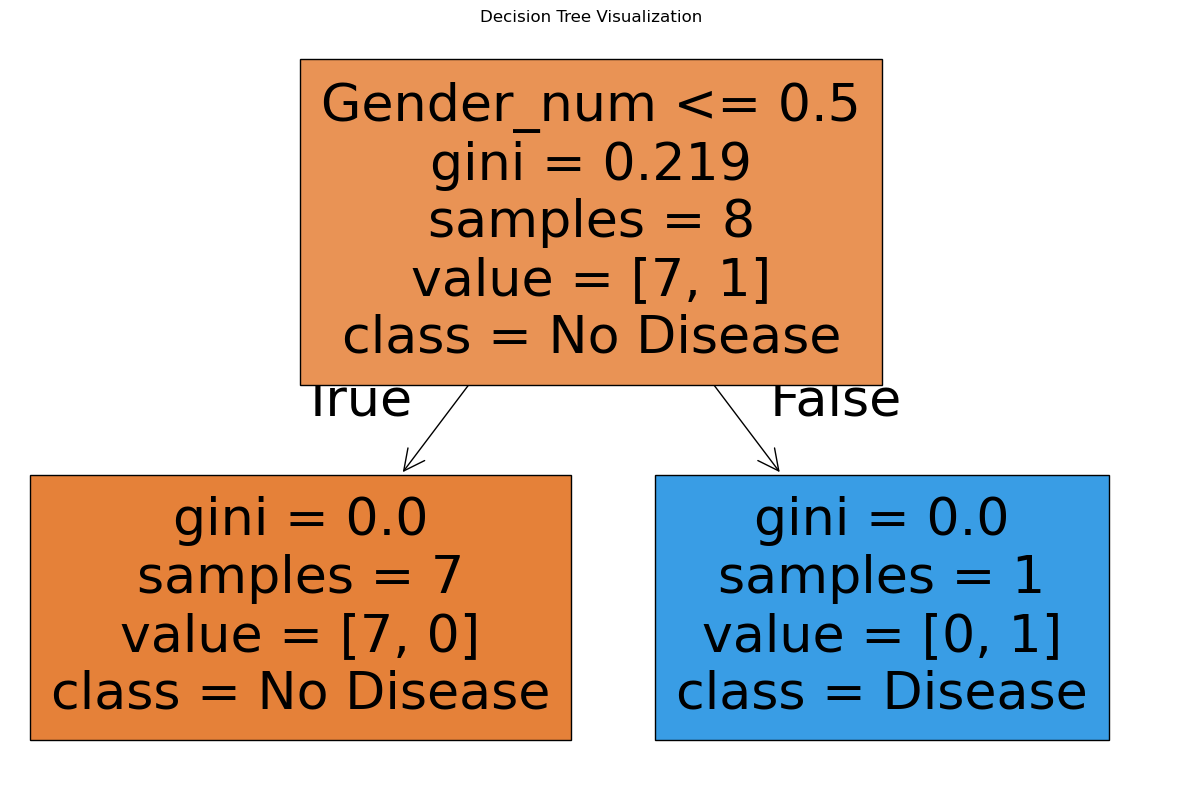

C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


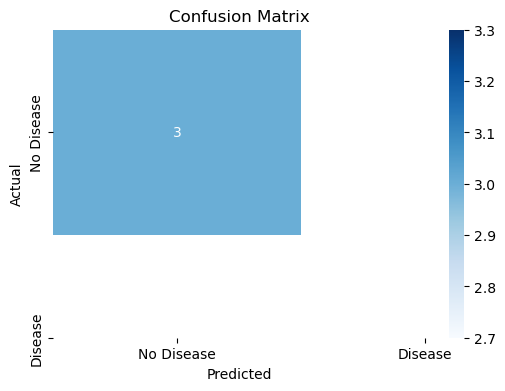

C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


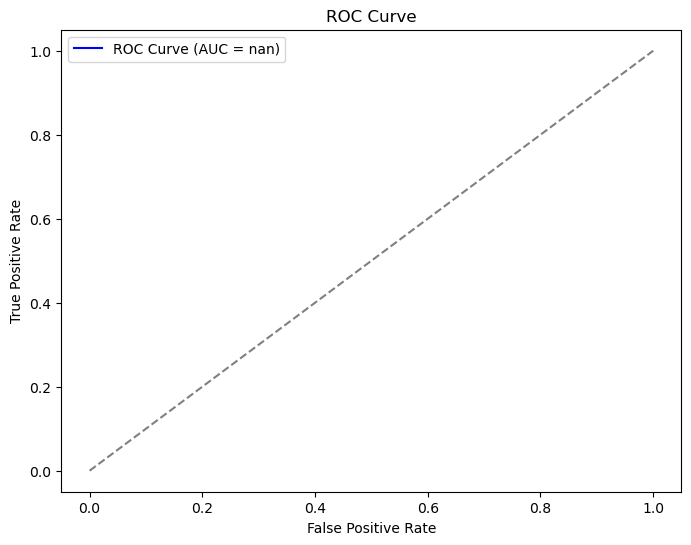

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Load the dataset
df = pd.read_excel(r"C:\Users\acer\Downloads\Decision Tree\Decision Tree\heart_disease.xlsx")

# Display basic information
print(df.info())
print(df.head())

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Data Preprocessing
df.dropna(inplace=True)  # Remove missing values

# Check column names and correct data format
print("Columns in dataset:", df.columns)

# Rename columns if necessary (fix incorrect column names)
df.columns = df.iloc[0]  # Set first row as column names
df = df[1:].reset_index(drop=True)  # Remove first row from data

# Convert categorical columns to numeric using one-hot encoding
df = pd.get_dummies(df)

# Ensure all columns are numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Handle any remaining NaN values (if any)
df.fillna(0, inplace=True)

# Identify the target column dynamically
target_column = [col for col in df.columns if 'target' in col.lower() or 'diagnosis' in col.lower()]
if target_column:
    target_column = target_column[0]
else:
    raise ValueError("Target column not found. Please check the dataset.")

# Split dataset into features and target
X = df.drop(columns=[target_column])
y = df[target_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Decision Tree Model
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# **1. Feature Importance Visualization**
plt.figure(figsize=(10, 5))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Decision Tree")
plt.show()

# **2. Decision Tree Visualization**
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# **3. Confusion Matrix Heatmap**
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# **4. ROC Curve Plot**
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()